In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_feather("~/ubiquant/data/input/train.feather")

## A first look over the data

In [4]:
obs = train.shape[0]
print(f"number of observations: {obs}")

number of observations: 1601312


In [8]:
time_steps, assets = train.time_id.nunique(), train.investment_id.nunique()
print(f"number of assets: {assets} \t time steps: {time_steps}")

number of assets: 2973 	 time steps: 708


In [9]:
print(f"number of assets: {assets} (range from {train.investment_id.min()} to {train.investment_id.max()})")

number of assets: 2973 (range from 1 to 3772)


## Target analysis

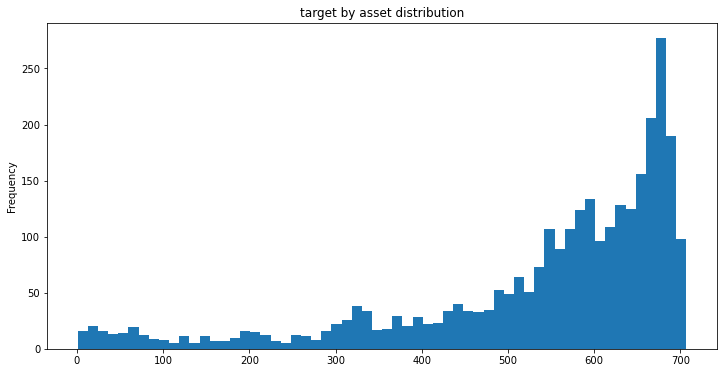

In [10]:
obs_by_asset = train.groupby(['investment_id'])['target'].count()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
obs_by_asset.plot.hist(bins=60)
plt.title("target by asset distribution")
plt.show()

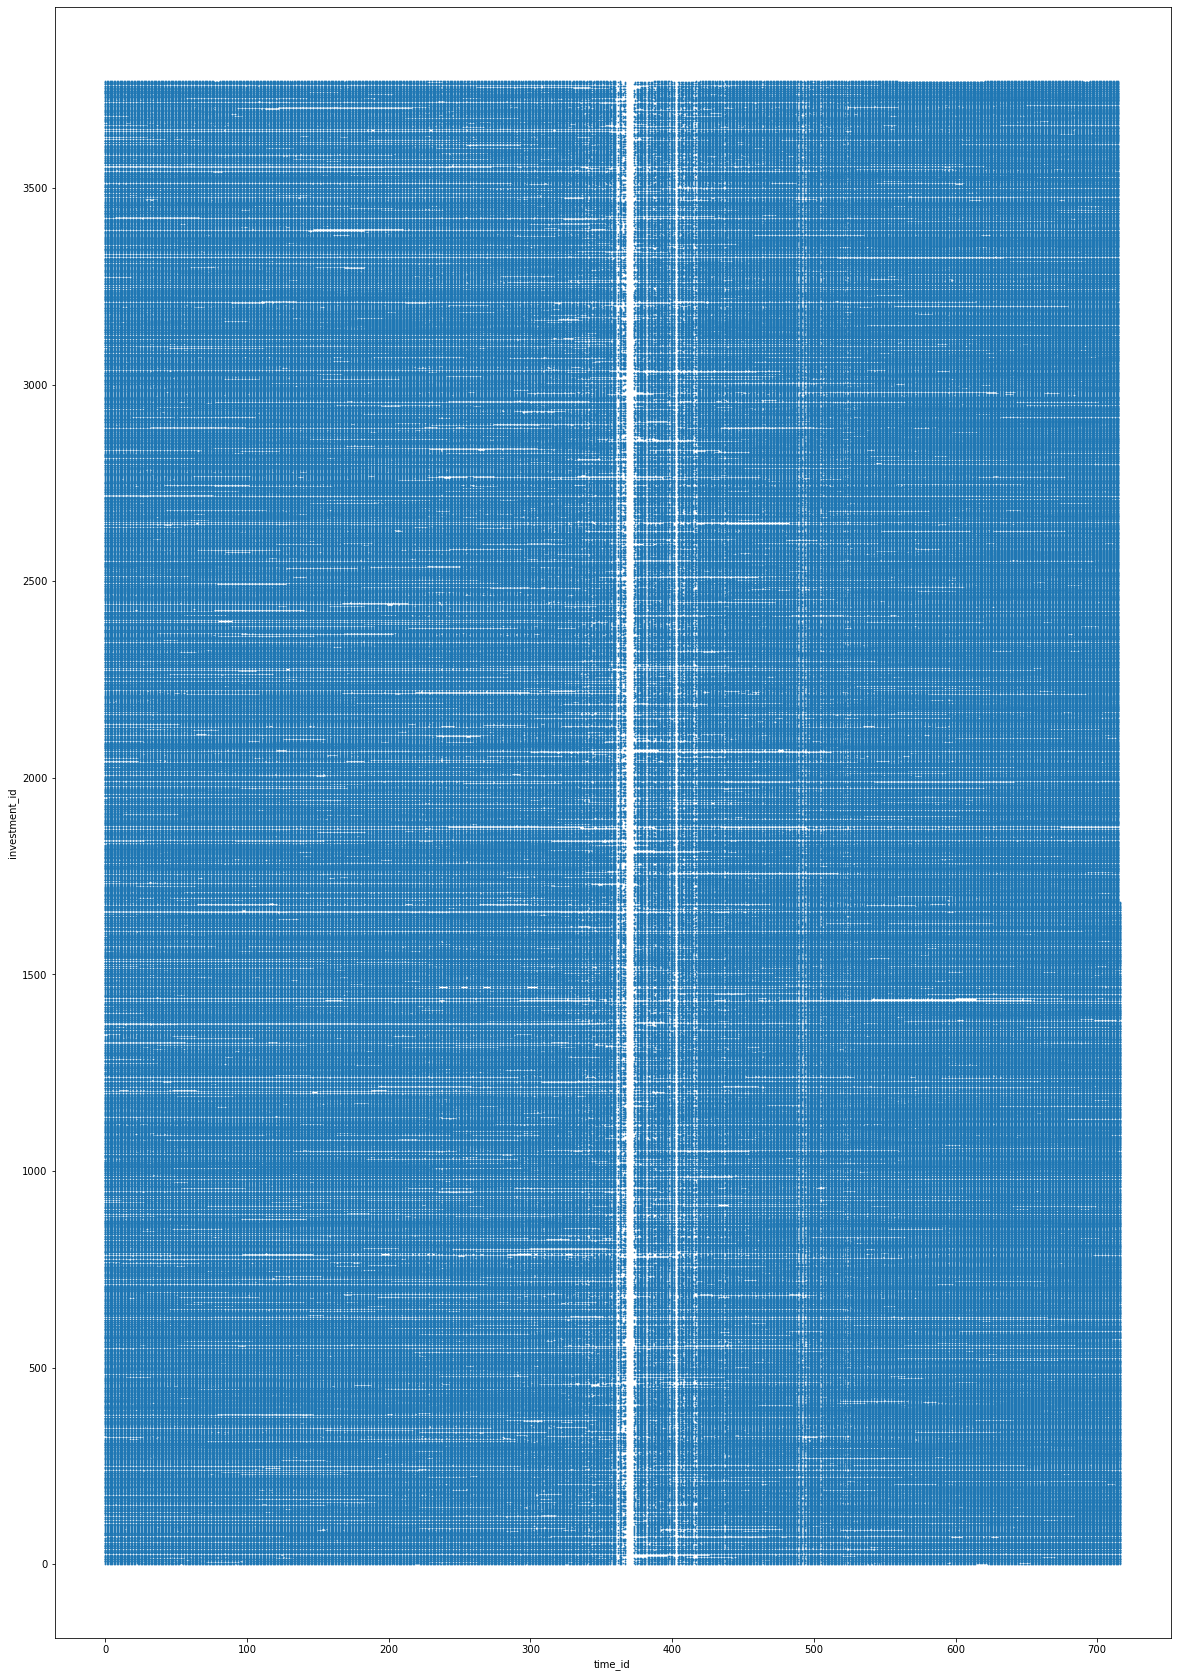

In [11]:
train[['investment_id', 'time_id']].plot.scatter('time_id', 'investment_id', figsize=(20, 30), s=0.5)
plt.show()

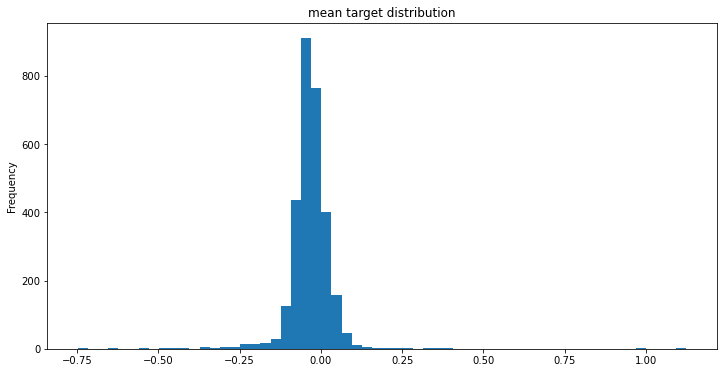

Mean of mean target: -0.03311


In [12]:
mean_target = train.groupby(['investment_id'])['target'].mean()
mean_mean_target = np.mean(mean_target)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
mean_target.plot.hist(bins=60)
plt.title("mean target distribution")
plt.show()

print(f"Mean of mean target: {mean_mean_target: 0.5f}")

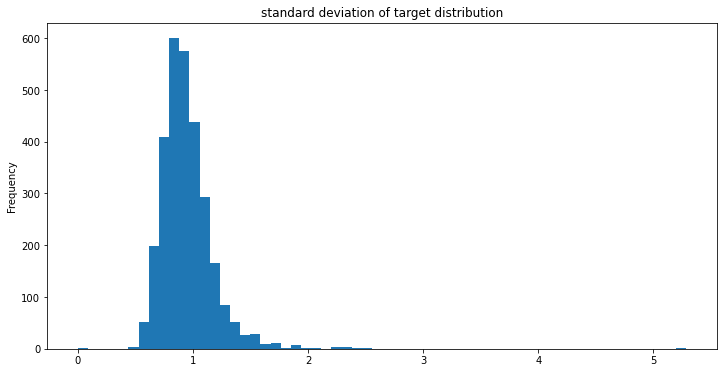

Mean of std target:  0.94642


In [14]:
sts_target = train.groupby(['investment_id'])['target'].std()
mean_std_target = np.mean(sts_target)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sts_target.plot.hist(bins=60)
plt.title("standard deviation of target distribution")
plt.show()

print(f"Mean of std target: {mean_std_target: 0.5f}")

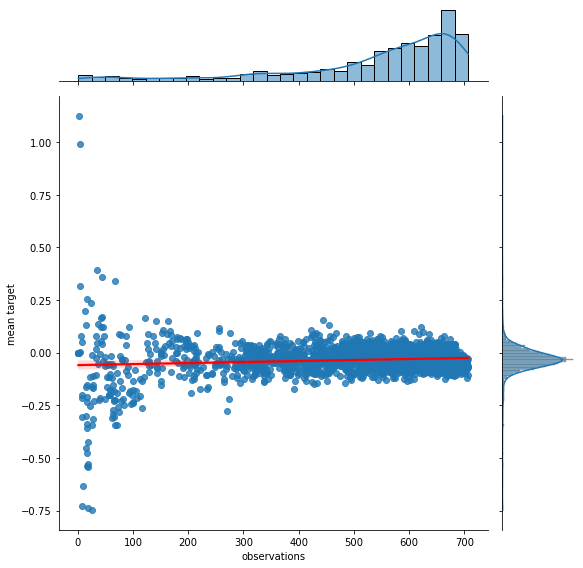

In [15]:
ax = sns.jointplot(x=obs_by_asset, y=mean_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('mean target')
plt.show()

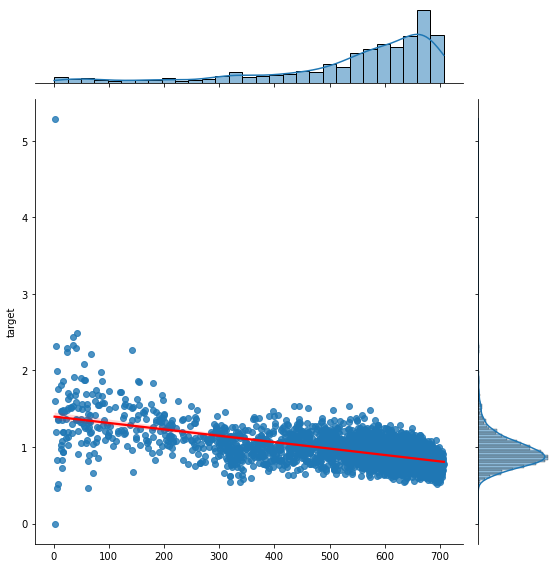

In [16]:
qx = sns.jointplot(x=obs_by_asset.values, y=sts_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('std target')
plt.show()

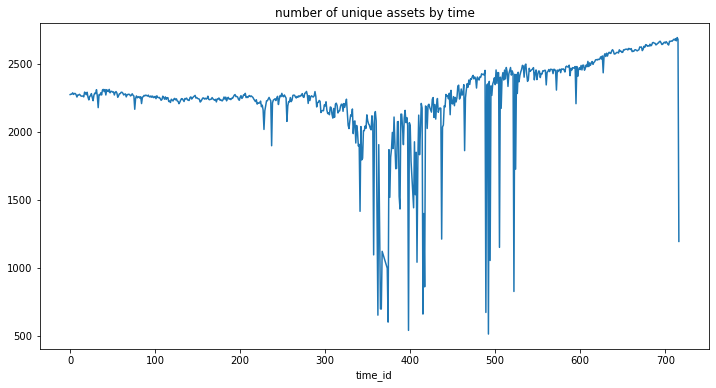

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train.groupby('time_id')['investment_id'].nunique().plot()
plt.title("number of unique assets by time")
plt.show()

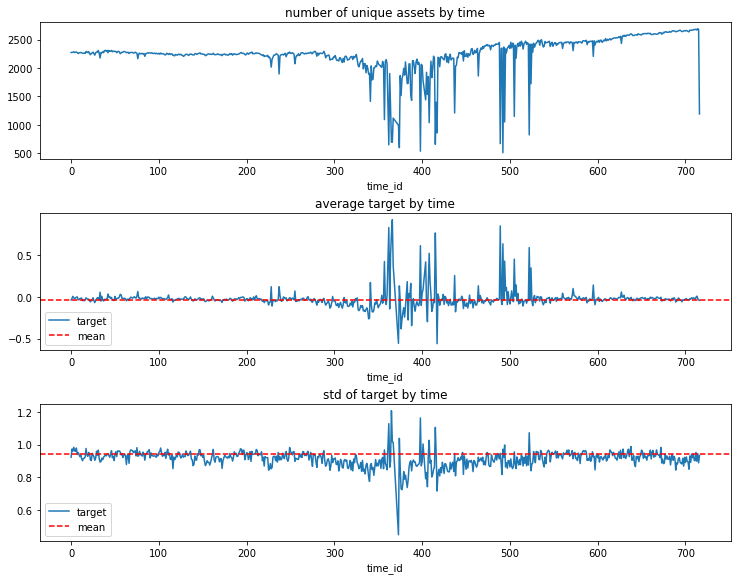

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1,)
(train.groupby('time_id')['investment_id'].nunique()).plot()
plt.title("number of unique assets by time")

plt.subplot(3, 1, 2)
train.groupby('time_id')['target'].mean().plot()
plt.title("average target by time")
plt.axhline(y=mean_mean_target, color='r', linestyle='--', label="mean")
plt.legend(loc='lower left')

plt.subplot(3, 1, 3)
train.groupby('time_id')['target'].std().plot()
plt.title("std of target by time")
plt.axhline(y=mean_std_target, color='r', linestyle='--', label="mean")
plt.legend(loc='lower left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [19]:
r = np.corrcoef(train.groupby('time_id')['investment_id'].nunique(), train.groupby('time_id')['target'].mean())[0][1]
print(f"Correlation of number of assets by target: {r:0.3f}")

Correlation of number of assets by target: -0.460


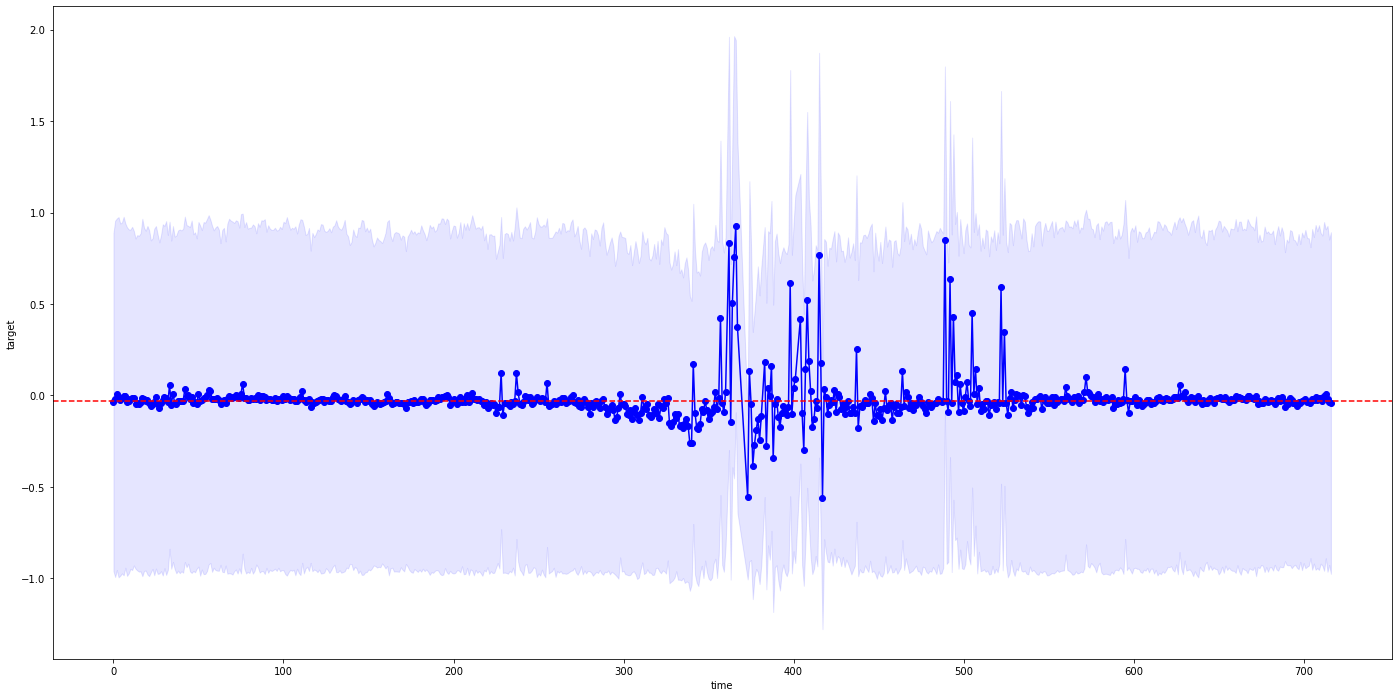

In [20]:
time2target_mean = train.groupby(['time_id'])['target'].mean()
time2target_std = train.groupby(['time_id'])['target'].std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_mean_target, color='r', linestyle='--', label="mean")
axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

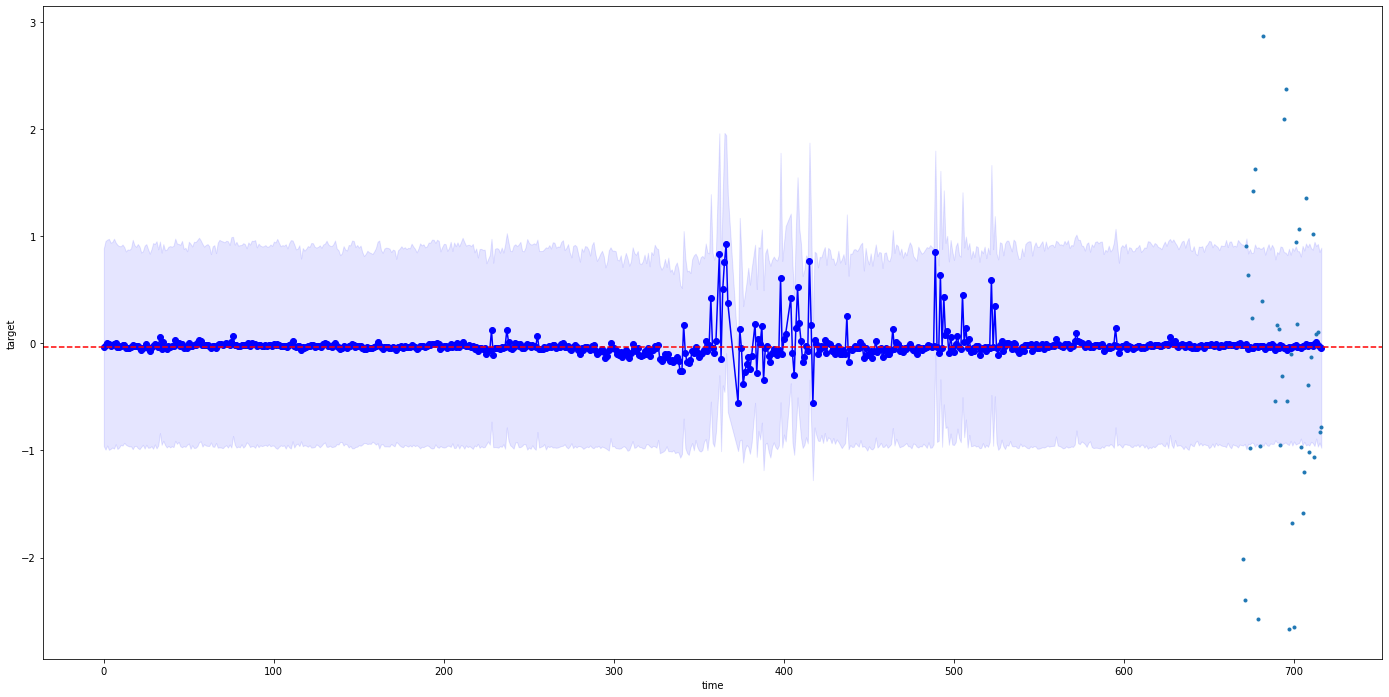

In [22]:
time2target_mean = train.groupby(['time_id'])['target'].mean()
time2target_std = train.groupby(['time_id'])['target'].std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_mean_target, color='r', linestyle='--', label="mean")

asset = 70
plt.plot(train[train.investment_id==asset].time_id,
               train[train.investment_id==asset].target, '.')

axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

In [23]:
obs_by_asset = train.groupby(['investment_id'])['target'].count().to_dict()
target = train.investment_id.copy().replace(obs_by_asset).astype(np.int16)
features = train.columns[4:]

del(obs_by_asset)

In [24]:
corrs = list()
for col in features:
    corr = np.corrcoef(target, train[col])[0][1]
    corrs.append(corr)
    
del(target)

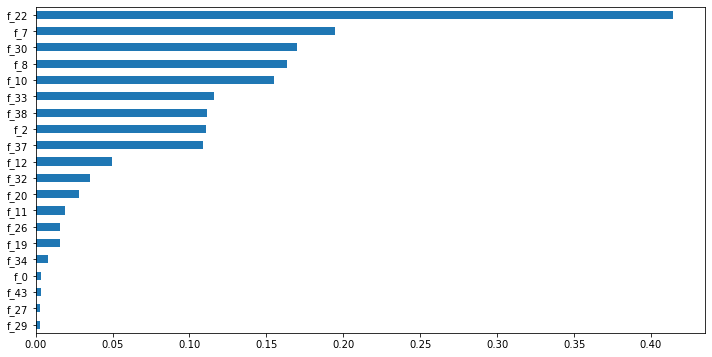

In [25]:
feat_importances = pd.Series(corrs, index=features)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12, 6)).invert_yaxis()
plt.show()